# Implementing Support Vector Classification Model to Predict Wine Quality with Performance Metrics and Hyperparameter Tuning

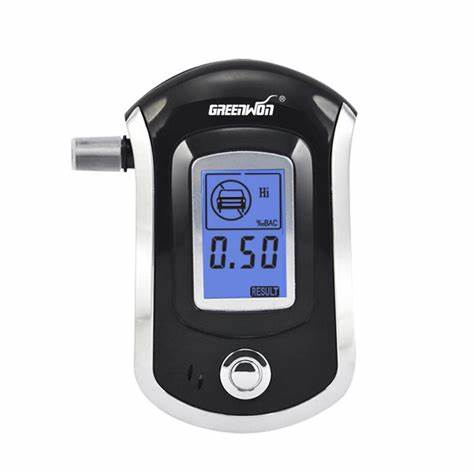

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [126]:
df = pd.read_excel('Wine_quality.xlsx')

In [127]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [128]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [129]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [131]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Here we have to predict the quality of the wine and it is multi-class classification problem.

In [133]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [134]:
X = df.drop('quality', axis = 1)

In [135]:
y = df['quality']

In [136]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [137]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


# Train Test Split

In [138]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1119, 11) (480, 11)
(1119,) (480,)


# Standardization

In [139]:
from sklearn.preprocessing import StandardScaler

In [140]:
scaler = StandardScaler()

In [141]:
X_train_transformed = scaler.fit_transform(X_train)
X_train_transformed

array([[ 0.148946  , -0.21805975,  0.09198246, ..., -2.44401495,
         7.38541198, -0.57305829],
       [-0.19565202, -1.8904618 ,  0.50266921, ..., -2.70198342,
        -1.23446181,  2.15167645],
       [-0.88484805,  0.75301242, -1.39675703, ...,  0.58711457,
         0.44473439, -0.66701466],
       ...,
       [-0.25308502,  0.21352788,  0.19465414, ..., -0.12229872,
         0.16486835, -0.8549274 ],
       [ 2.67599811, -0.32595665,  1.11869934, ..., -0.05780661,
         0.10889515,  2.15167645],
       [ 0.83814203,  2.42541447,  0.24598999, ..., -0.38026719,
        -1.01056898, -0.94888377]])

In [142]:
print(scaler.mean_)

[ 8.3406613   0.53042002  0.27208222  2.55527256  0.08768543 16.2484361
 47.44772118  0.99675475  3.30896336  0.66054513 10.40991957]


# Model Building

In [143]:
from sklearn.svm import SVC
model=SVC()

In [144]:
model.fit(X_train_transformed, y_train)

SVC()

In [145]:
model.score(X_train_transformed, y_train)

0.6702412868632708

In [146]:
X_test_transform = scaler.transform(X_test)

In [147]:
y_pred = model.predict(X_test_transform)

In [148]:
y_pred

array([5, 5, 7, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 7, 5, 6, 5, 6, 5,
       6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 6, 7,
       6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 7, 6, 5, 6, 6, 6, 5, 6,
       5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5,
       5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 7, 6, 6, 6, 5, 5, 5, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 6, 7, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 7, 5, 5,
       6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 7, 6, 5, 6, 6, 5, 5,
       6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 7, 6, 6,
       7, 7, 6, 5, 5, 7, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5,
       6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5,
       5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 7, 6, 6, 5, 6,
       5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 7, 5, 6,
       5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 7, 5, 7, 6, 6, 6, 5,
       5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6,

In [149]:
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dataset.head()

,Actual,Predicted
1109,6,5
1032,5,5
1002,7,7
487,6,5
979,5,6


# Performance Metrics

In [150]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.68      0.72      0.70       208
           6       0.60      0.68      0.64       204
           7       0.53      0.36      0.43        45
           8       0.00      0.00      0.00         5

    accuracy                           0.63       480
   macro avg       0.30      0.29      0.29       480
weighted avg       0.60      0.63      0.61       480



C:\Users\Thanmai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Thanmai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Thanmai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [151]:
from sklearn.metrics import accuracy_score

In [152]:
accuracy_score(y_test,y_pred )

0.6333333333333333

# Hyper Parameter Tuning Using GridSearchCV

In [153]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.424 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.424 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.424 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.420 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.422 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.607 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.585 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.567 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.552 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.562 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.598 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.638 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.621 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.664 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.571 total time=   0.1s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.576 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.576 total time=   0.1s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.585 total time=   0.1s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.632 total time=   0.1s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.616 total time=   0.1s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.634 total time=   0.1s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.567 total time=   0.1s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [154]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, gamma=1)


In [155]:
grid_predictions = grid.predict(X_test_transform)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       1.00      0.07      0.12        15
           5       0.62      0.78      0.69       208
           6       0.66      0.58      0.62       204
           7       0.63      0.49      0.55        45
           8       0.00      0.00      0.00         5

    accuracy                           0.63       480
   macro avg       0.48      0.32      0.33       480
weighted avg       0.64      0.63      0.62       480



C:\Users\Thanmai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Thanmai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Thanmai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Hyper Parameter Tuning Using RandomizedSearchCV

In [167]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}

rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_transformed, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...C=7.752719229365679, gamma=0.0011912416864431734; total time=   0.0s
[CV] END ...C=7.752719229365679, gamma=0.0011912416864431734; total time=   0.0s
[CV] END ...C=7.752719229365679, gamma=0.0011912416864431734; total time=   0.0s
[CV] END ..C=6.4195894839340255, gamma=0.0031814026014718795; total time=   0.0s
[CV] END ..C=6.4195894839340255, gamma=0.0031814026014718795; total time=   0.0s
[CV] END ..C=6.4195894839340255, gamma=0.0031814026014718795; total time=   0.0s
[CV] END ....C=8.852261539524186, gamma=0.001001646605187374; total time=   0.0s
[CV] END ....C=8.852261539524186, gamma=0.001001646605187374; total time=   0.0s
[CV] END ....C=8.852261539524186, gamma=0.001001646605187374; total time=   0.0s
[CV] END ...C=4.651484771389274, gamma=0.0018551362165113612; total time=   0.0s
[CV] END ...C=4.651484771389274, gamma=0.0018551362165113612; total time=   0.0s
[CV] END ...C=4.651484771389274, gamma=0.0018551

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000013DA1A17D90>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000013DB5B347F0>},
                   verbose=2)

In [163]:
rnd_search_cv.best_estimator_

SVC(C=7.523343144919274, gamma=0.017972648603462222)

In [164]:
rnd_search_cv.best_score_

0.5862377122430741

In [165]:
rnd_search_cv.best_estimator_.fit(X_train_transformed, y_train)

SVC(C=7.523343144919274, gamma=0.017972648603462222)

In [166]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_transform)
accuracy_score(y_test, y_pred)

0.625

In [156]:
from sklearn.linear_model  import LogisticRegression

In [157]:
model2  = LogisticRegression()

model2.fit(X_train_transformed,y_train)

LogisticRegression()

In [158]:
y_pred2 = model2.predict(X_test_transform)

In [159]:
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
dataset.head()

,Actual,Predicted
1109,6,6
1032,5,5
1002,7,7
487,6,5
979,5,6


In [160]:
accuracy_score(y_test,y_pred2 )

0.6208333333333333

Increase the accuracy
Gridsearch CV -- Hyperparameter tuning
Implement addmission prediction
https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv